## Prediction of app ads commercial conversation rate

## 1. Business understanding
App advertising plays a vital role in supporting smartphone apps. Advertisers in display advertising may design and campaigns with different product goals and can start numerious campains, with each is associated with a couple of ads. 
In order to maximize the expected revenue, the app must predict the probability of a click on an ad, more commonly known as click conversion rate (CVR) of an ad. 
The convertion rate is defined as the the rate of click and buy the product in the ads after clicking them:
pCVR = P(coverstion = 1|Ad, User, Context)
The task of this work is to predict the users' interest in an advertisement by examing pCVR. 


## 2. Data understanding: 
Data were sampled for the length of two weeks in a social media app, and various user domains (domastic regions, age, gender, etc). Data from the first 13 days were used to train the odel and predict the CVR.
Each sample is a log from a single click. Label is 0 (no conversation), or 1(conversion)
All feature values are categorical and encrypted.

2.1. Ads related features:
- advertizerID
- campainingID: a collection of commercial ads
- adID: target app, size, ideas, target customers, bid
- creativeID:
- appID: app promoted in the ads
- appCategory: category of app promoted in the ads. Three digit code.  First digit: first category; second and third digit: sub category
- appPlatform: operation system, i.e. android, iOS, or unknown. Each app ID only belongs to one platform. 


2.2. User features:
- usderID
- age: [0,80], 0 means unknown
- gender: male, female, unknown
- eduation
- marriageStatus
- haveBaby
- Hometown: four digit code
- residence: four digit code
- appInstallList

2.3. Context features: 
- positionID
- sitesetID
- positionType
- connectionType
- Carrier

2.4. Evalution: Logarithmic loss

$ L_ {log}(y_{i}, p_{i}) = -\frac{1}{N}\sum \limits _{i=1} ^{n}(y_{i} log(p_{i}) + (1-y_{i}) log(1-p_{i}))$

Where $N$ is the total sample size, $y_{i}$ is the binary variable with value of $0$ and $1$, $p_{i}$ is the probability of conversion  = 1

## 3. Data preparation and feature extraction

In [3]:
# important libraries required
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
#Load train and test datadata
df_train = pd.read_csv("./data/train.csv")
df_test = pd.read_csv("./data/test.csv") #the test data didn't provide any true labels. Can only predict the probability


In [5]:
df_train.head()

,label,clickTime,conversionTime,creativeID,userID,positionID,connectionType,telecomsOperator
0,0,170000,NaN,3089,2798058,293,1,1
1,0,170000,NaN,1259,463234,6161,1,2
2,0,170000,NaN,4465,1857485,7434,4,1
3,0,170000,NaN,1004,2038823,977,1,1
4,0,170000,NaN,1887,2015141,3688,1,1


In [6]:
df_train.describe()

,label,clickTime,conversionTime,creativeID,userID,positionID,connectionType,telecomsOperator
count,3.749528e+06,3.749528e+06,93262.000000,3.749528e+06,3.749528e+06,3.749528e+06,3.749528e+06,3.749528e+06
mean,2.487300e-02,2.418317e+05,242645.358013,3.261575e+03,1.405349e+06,3.702799e+03,1.222590e+00,1.605879e+00
std,1.557380e-01,3.958793e+04,39285.385532,1.829643e+03,8.088094e+05,1.923724e+03,5.744428e-01,8.491127e-01
min,0.000000e+00,1.700000e+05,170005.000000,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,2.116270e+05,211626.000000,1.540000e+03,7.058698e+05,2.579000e+03,1.000000e+00,1.000000e+00
50%,0.000000e+00,2.418390e+05,242106.000000,3.465000e+03,1.407062e+06,3.322000e+03,1.000000e+00,1.000000e+00
75%,0.000000e+00,2.722170e+05,272344.000000,4.565000e+03,2.105989e+06,4.896000e+03,1.000000e+00,2.000000e+00
max,1.000000e+00,3.023590e+05,302359.000000,6.582000e+03,2.805118e+06,7.645000e+03,4.000000e+00,3.000000e+00


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3749528 entries, 0 to 3749527
Data columns (total 8 columns):
 #   Column            Dtype  
---  ------            -----  
 0   label             int64  
 1   clickTime         int64  
 2   conversionTime    float64
 3   creativeID        int64  
 4   userID            int64  
 5   positionID        int64  
 6   connectionType    int64  
 7   telecomsOperator  int64  
dtypes: float64(1), int64(7)
memory usage: 228.9 MB


In [8]:
df_train.label.value_counts() #unbalanced data

0    3656266
1      93262
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

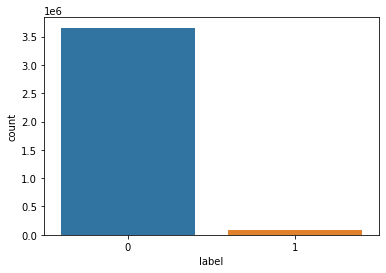

In [17]:
sns.countplot(x = 'label',data = df_train)

### extract click day and time

variable "clickTime" contains day (two two digit) and time (3rd and 4th digit). Samples tain samples contains day 17 to day 30. 

In [18]:
def ext_day(cT):
    ext_day= int(str(cT)[0:2])
    return ext_day
def ext_time(cT):
    ext_time = int(str(cT)[2:4])
    return ext_time

In [19]:
df_train['click_day'] = df_train['clickTime'].apply(ext_day)
df_train['click_time']= df_train['clickTime'].apply(ext_time)

In [20]:
df_train.head()

,label,clickTime,conversionTime,creativeID,userID,positionID,connectionType,telecomsOperator,click_day,click_time
0,0,170000,NaN,3089,2798058,293,1,1,17,0
1,0,170000,NaN,1259,463234,6161,1,2,17,0
2,0,170000,NaN,4465,1857485,7434,4,1,17,0
3,0,170000,NaN,1004,2038823,977,1,1,17,0
4,0,170000,NaN,1887,2015141,3688,1,1,17,0


Convert the clicktime to day and time in test file

In [21]:
df_test['click_day'] = df_test['clickTime'].apply(ext_day)
df_test['click_time']= df_test['clickTime'].apply(ext_time)

Visualize the CVR for training data by day

In [22]:
cvr_by_day = df_train.groupby(by = 'click_day',as_index=False)['label'].mean()

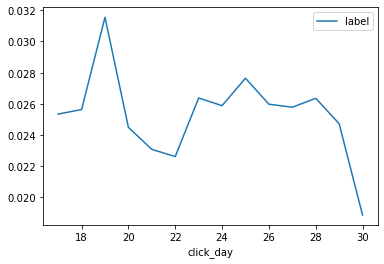

In [23]:
cvr_by_day.plot(x = 'click_day',y = 'label')
plt.show()

### Feature extraction

In [24]:
#Load feature data
df_Ad = pd.read_csv("./data/ad.csv")
df_appCat = pd.read_csv ('./data/app_categories.csv')


### app category

In [25]:
df_appCat.head()

,appID,appCategory
0,14,2
1,25,203
2,68,104
3,75,402
4,83,203


<AxesSubplot:>

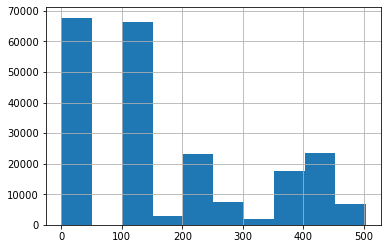

In [26]:
df_appCat['appCategory'].hist (bins = 10) #can be removed

App category is encoded with three digit, the left is the first category while the second and the third digits are the second category. The appCategory column therefore needs a dephycer. 

In [27]:
def cat_dephycer (cat):

    first_type = []
    second_type = []
    
    for i in range (0, len (cat)):
        
        if cat[i] ==0:
            first_type.append (0)
            second_type.append (0)
        else:
            first_type.append (cat[i]//100)
            second_type.append (cat[i]%100)
        
    subcat = pd.DataFrame ({'first_cat':first_type, 'second_cat':second_type})
    
    return subcat
    

In [28]:
df_subcat = cat_dephycer (df_appCat['appCategory'])
df_subcat.head()

,first_cat,second_cat
0,0,2
1,2,3
2,1,4
3,4,2
4,2,3


In [29]:
#create a dataframe contains subcat info
df_appCat2 =pd.concat([df_appCat, df_subcat], axis=1)
df_appCat2.head()

,appID,appCategory,first_cat,second_cat
0,14,2,0,2
1,25,203,2,3
2,68,104,1,4
3,75,402,4,2
4,83,203,2,3


### User features

In [30]:
df_users= pd.read_csv ('./data/user.csv')

In [31]:
df_users['age'].isna().sum() #check if any missing value

0

In [32]:
df_users.age.value_counts()# 0 means unknown

0     294271
15    150175
16    120322
17    115704
19    115692
       ...  
76        85
75        81
72        77
77        72
79        55
Name: age, Length: 81, dtype: int64

<AxesSubplot:xlabel='age', ylabel='Count'>

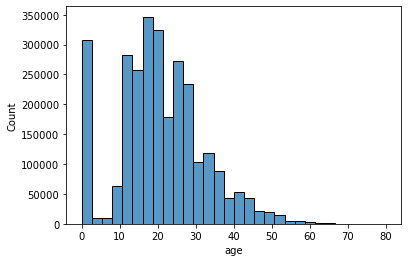

In [35]:
sns.histplot(df_users['age'],kde = False, bins = 30)

##0 means unknown!

In [36]:
## a function to create subgroup for age:

bins= [-1,0,10,20,40,60,110]
labels = [0,1,2,3,4,6]
df_users['ageGroup'] = pd.cut(df_users['age'], bins=bins, labels=labels, right=False)

In [37]:
df_users.head()

,userID,age,gender,education,marriageStatus,haveBaby,hometown,residence,ageGroup
0,1,42,1,0,2,0,512,503,4
1,2,18,1,5,1,0,1403,1403,2
2,3,0,2,4,0,0,0,0,1
3,4,21,2,5,3,0,607,607,3
4,5,22,2,0,0,0,0,1301,3


The model performance is usually characterized by the demographic distribution of the targeted audiences.

In [43]:
def address_dephycer (hor):

    prov = []
    city = []
    
    for i in range (0, len (hor)):
        
        if hor[i] ==0:
            prov.append (0)
            city.append (0)
        else:
            prov.append (hor[i]//100)
            city.append (hor[i]%100)
        
    subloc = prov,city
    
    return subloc

In [44]:
ht_province, ht_city = address_dephycer(df_users.hometown)

In [45]:
red_province, red_city = address_dephycer (df_users. residence)

In [48]:
df_subhor = pd.DataFrame ({"home_prov":ht_province,
                           "home_city":ht_city,
                           "res_prov":red_province, 
                           "res_city": red_city})

In [49]:
df_users2 = pd.concat ([df_users, df_subhor], axis = 1)
df_users2.head()


,userID,age,gender,education,marriageStatus,haveBaby,hometown,residence,ageGroup,home_prov,home_city,res_prov,res_city
0,1,42,1,0,2,0,512,503,4,5,12,5,3
1,2,18,1,5,1,0,1403,1403,2,14,3,14,3
2,3,0,2,4,0,0,0,0,1,0,0,0,0
3,4,21,2,5,3,0,607,607,3,6,7,6,7
4,5,22,2,0,0,0,0,1301,3,0,0,13,1


## merge data

In [50]:
train_user = pd.merge(df_train,df_users2,on='userID')
train_user_ad = pd.merge(train_user,df_Ad,on='creativeID')
train_user_ad_app = pd.merge(train_user_ad,df_appCat2,on='appID')

In [51]:
train_user_ad_app.head()

,label,clickTime,conversionTime,creativeID,userID,positionID,connectionType,telecomsOperator,click_day,click_time,...,res_prov,res_city,adID,camgaignID,advertiserID,appID,appPlatform,appCategory,first_cat,second_cat
0,0,170000,NaN,3089,2798058,293,1,1,17,0,...,13,1,1321,83,10,434,1,108,1,8
1,0,170001,NaN,3089,195578,3659,0,2,17,0,...,13,1,1321,83,10,434,1,108,1,8
2,0,170014,NaN,3089,1462213,3659,0,3,17,0,...,13,1,1321,83,10,434,1,108,1,8
3,0,170030,NaN,3089,1985880,5581,1,1,17,0,...,0,0,1321,83,10,434,1,108,1,8
4,0,170047,NaN,3089,2152167,5581,1,1,17,0,...,13,3,1321,83,10,434,1,108,1,8


Text(0.5, 0, 'AgeGroup')

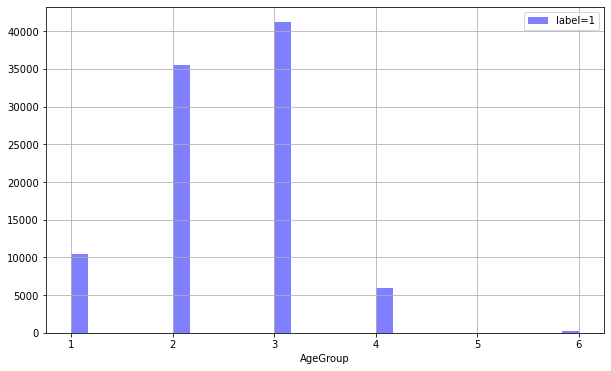

In [55]:
plt.figure(figsize=(10,6)) # can be removed
train_user_ad_app[train_user_ad_app ['label']==1]['ageGroup'].hist(alpha=0.5,color='blue',
                                              bins=30,label='label=1')
#train_user_ad_app[train_user_ad_app ['label']==0]['ageGroup'].hist(alpha=0.5,color='red',
                                              #bins=30,label='label=0')
plt.legend()
plt.xlabel('AgeGroup')

Text(0.5, 0, 'click_time')

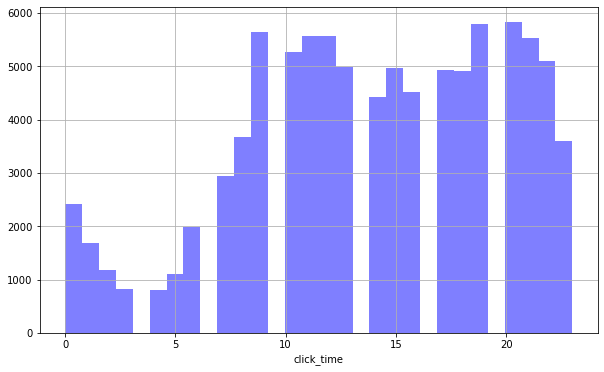

In [56]:
plt.figure(figsize=(10,6))
train_user_ad_app[train_user_ad_app['label']==1]['click_time'].hist(alpha=0.5,color='blue',
                                              bins=30,label='label=1')
#train_user_ad_app[train_user_ad_app['label']==0]['click_time'].hist(alpha=0.5,color='red',
                                              #bins=30,label='label=1')
#plt.legend()
plt.xlabel('click_time')

Text(0.5, 0, 'res_prov')

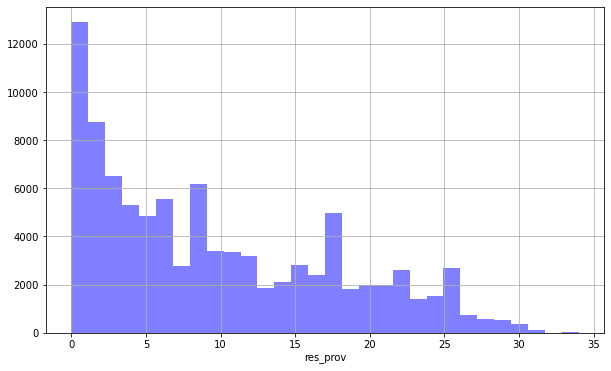

In [57]:
plt.figure(figsize=(10,6))
train_user_ad_app[train_user_ad_app['label']==1]['res_prov'].hist(alpha=0.5,color='blue',
                                              bins=30,label='label=1')
#train_user_ad_app[train_user_ad_app['label']==0]['res_prov'].hist(alpha=0.5,color='red',
                                              #bins=30,label='label=0')
#plt.legend()
plt.xlabel('res_prov')

check the probability and log_loss for naive prediction

In [98]:
bi_prob = [[0.975, 0.025] for _ in range(len(y_test))]
avg_logloss = log_loss(y_test, bi_prob)
print('Baseline: Log Loss=%.3f' % (avg_logloss))
#baseline: 0.119

Baseline: Log Loss=0.119


## 3. Model selections and validation

### prepare training data for model selection

In [58]:
train_user_ad_app.columns

Index(['label', 'clickTime', 'conversionTime', 'creativeID', 'userID',
       'positionID', 'connectionType', 'telecomsOperator', 'click_day',
       'click_time', 'age', 'gender', 'education', 'marriageStatus',
       'haveBaby', 'hometown', 'residence', 'ageGroup', 'home_prov',
       'home_city', 'res_prov', 'res_city', 'adID', 'camgaignID',
       'advertiserID', 'appID', 'appPlatform', 'appCategory', 'first_cat',
       'second_cat'],
      dtype='object')

In [61]:
fea_list = [ 'creativeID', 'userID',
       'positionID', 'connectionType', 'telecomsOperator', 'click_day',
       'click_time', 'age', 'gender', 'education', 'marriageStatus',
       'haveBaby', 'ageGroup', 'home_prov',
       'home_city', 'res_prov', 'res_city', 'adID', 'camgaignID',
       'advertiserID', 'appID', 'appPlatform', 'appCategory', 'first_cat',
       'second_cat']

This dataset is a time serie data, the newer data should not be used to predict the older data. 
the dataset was split by time

In [62]:

df_all_train = train_user_ad_app [train_user_ad_app.click_day < 25]
df_all_val = train_user_ad_app [(train_user_ad_app.click_day >24) & (train_user_ad_app.click_day <28)]
df_all_test = train_user_ad_app[(train_user_ad_app.click_day>27)& (train_user_ad_app.click_day<30)]

X_train = np.array (df_all_train[fea_list],dtype = 'int32')

X_val = np.array (df_all_val[fea_list],dtype = 'int32')

X_test = np.array (df_all_test[fea_list],dtype = 'int32')

y_train = df_all_train ['label']

y_val = df_all_val ['label']

y_test = df_all_test ['label']

In [63]:
##apply scaler

In [68]:
from sklearn.preprocessing import StandardScaler

In [69]:
scaler = StandardScaler()
X_train = scaler.fit_transform (X_train)
X_val = scaler.transform (X_val)
X_test = scaler.transform (X_test)

In [70]:
print ('X_train dimension:',X_train.shape)
print ('X_val dimension:',X_val.shape)
print ('X_test dimension:', X_test.shape)

X_train dimension: (1973356, 25)
X_val dimension: (861372, 25)
X_test dimension: (580403, 25)


### Fit the first random forest classifier

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss

In [72]:
rfc = RandomForestClassifier(random_state=0, 
                             n_jobs=-1, 
                             n_estimators=500, 
                             class_weight="balanced_subsample")
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced_subsample', n_estimators=500,
                       n_jobs=-1, random_state=0)

In [73]:
importances_rfc1 = rfc.feature_importances_

indices_rfc1 = np.argsort(importances_rfc1)[::-1]

In [74]:
importances_rfc1

array([0.0400726 , 0.11406049, 0.08129979, 0.03889858, 0.02534686,
       0.04563041, 0.07700522, 0.06943604, 0.01386067, 0.03990342,
       0.02523754, 0.0147087 , 0.01139273, 0.04932134, 0.04496558,
       0.06808084, 0.05996724, 0.02964867, 0.02803265, 0.03491637,
       0.03417702, 0.00408449, 0.02003621, 0.01321941, 0.01669715])

In [75]:
indices_rfc1

array([ 1,  2,  6,  7, 15, 16, 13,  5, 14,  0,  9,  3, 19, 20, 17, 18,  4,
       10, 22, 24, 11,  8, 23, 12, 21])

In [76]:
np.array(fea_list)[indices_rfc1]

array(['userID', 'positionID', 'click_time', 'age', 'res_prov',
       'res_city', 'home_prov', 'click_day', 'home_city', 'creativeID',
       'education', 'connectionType', 'advertiserID', 'appID', 'adID',
       'camgaignID', 'telecomsOperator', 'marriageStatus', 'appCategory',
       'second_cat', 'haveBaby', 'gender', 'first_cat', 'ageGroup',
       'appPlatform'], dtype='<U16')

 1) userID                         0.114060
 2) positionID                     0.081300
 3) click_time                     0.077005
 4) age                            0.069436
 5) res_prov                       0.068081
 6) res_city                       0.059967
 7) home_prov                      0.049321
 8) click_day                      0.045630
 9) home_city                      0.044966
10) creativeID                     0.040073
11) education                      0.039903
12) connectionType                 0.038899
13) advertiserID                   0.034916
14) appID                          0.034177
15) adID                           0.029649
16) camgaignID                     0.028033
17) telecomsOperator               0.025347
18) marriageStatus                 0.025238
19) appCategory                    0.020036
20) second_cat                     0.016697
21) haveBaby                       0.014709
22) gender                         0.013861
23) first_cat                   

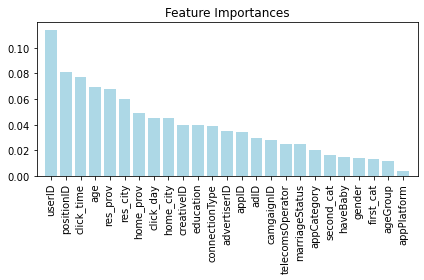

In [79]:
for i in range(len(importances_rfc1)):
    print("%2d) %-*s %f" % (i + 1, 30, 
                            fea_list[indices_rfc1[i]], 
                            importances_rfc1[indices_rfc1[i]]))

plt.title('Feature Importances')
plt.bar(range(len(importances_rfc1)), 
        importances_rfc1[indices_rfc1],
        color='lightblue', 
        align='center')

plt.xticks(range(len(importances_rfc1)), 
           np.array(fea_list)[indices_rfc1], rotation=90)

plt.xlim([-1, len(importances_rfc1)])
plt.tight_layout()

plt.show()

### prediction loss function

In [80]:
rfc_pred1 = rfc.predict  (X_test)
rfc_probab1 = rfc.predict_proba(X_test)[:,1]

In [83]:
rfc_ll = log_loss (y_test, rfc_probab1)

In [84]:
print (rfc_ll)

0.11674123594775218


In [85]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,rfc_pred1))
print (confusion_matrix (y_test, rfc_pred1))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99    565598
           1       0.10      0.00      0.00     14805

    accuracy                           0.97    580403
   macro avg       0.53      0.50      0.49    580403
weighted avg       0.95      0.97      0.96    580403

[[565579     19]
 [ 14803      2]]


### deal with imbalanced classes

In [86]:
import imblearn

In [87]:
##use over sampling 

In [88]:
from imblearn.over_sampling import SMOTE

In [89]:
smote= SMOTE()

In [90]:
x_sm,y_sm = smote.fit_resample(X_train,  y_train)

In [91]:
rfc2 = RandomForestClassifier(random_state=0, 
                              n_jobs=-1, 
                              n_estimators=50, 
                              class_weight="balanced_subsample")
rfc2.fit(x_sm, y_sm)

RandomForestClassifier(class_weight='balanced_subsample', n_estimators=50,
                       n_jobs=-1, random_state=0)

In [92]:
rfc2_pred = rfc2.predict  (X_test)
print(classification_report(y_test,rfc2_pred))
print (confusion_matrix (y_test, rfc2_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99    565598
           1       0.18      0.01      0.02     14805

    accuracy                           0.97    580403
   macro avg       0.58      0.50      0.50    580403
weighted avg       0.95      0.97      0.96    580403

[[564990    608]
 [ 14675    130]]


In [93]:
rfc2_proba = rfc2.predict_proba(X_test)[:,1]
rfc2_ll = log_loss (y_test, rfc2_proba)
print (rfc2_ll)

0.20166031056056383


In [450]:
conda install -c conda-forge lightgbm

Solving environment: done

## Package Plan ##

  environment location: /Users/ttian/opt/anaconda3

  added / updated specs:
    - lightgbm


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    lightgbm-3.3.2             |   py39h1e675f4_0         1.2 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         1.2 MB

The following NEW packages will be INSTALLED:

  lightgbm           conda-forge/osx-64::lightgbm-3.3.2-py39h1e675f4_0



lightgbm-3.3.2       | 1.2 MB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


In [94]:
import lightgbm as lgb


In [95]:
def valClassifierLGBM(x_train,y_train,x_val,y_val):
    
    print('starting training')
    lgb_train = lgb.Dataset(x_train, y_train,free_raw_data = False)
    lgb_val = lgb.Dataset(x_val, y_val,free_raw_data = False)
    params = {
        'task': 'train',
        'boosting_type': 'gbdt', #GradientBoostingDecisionTree
        'objective': 'binary',
        'metric': ['auc','binary_logloss'],
        #'max_depth':3,
        'num_leaves': 2500, 
        #'max_depth':8, # it is necessary to tune num_leaves with the max_depth together, num_leaves = 2^(max_depth)
        #'max_bin':150,  
        'learning_rate': 0.04,
        'feature_fraction': 0.4,
        'lambda_l1': 0.5,
        'lambda_l2': 0.5, #use lambda to tackle with overfitting risk
        #'is_unbalance': True,
        #'bagging_fraction': 0.85,this value only in use when use RF
        #'bagging_freq': 5,
        'verbose': 0,
        #'early_stopping_round':500
    }
    
    #origin:learning_rate': 0.02，num_boost_round=700,'num_leaves': 1000
    
    lgbm = lgb.train(params,
                lgb_train,valid_sets=lgb_val,
                num_boost_round=700)
    
    print(params)
    
    return lgbm

In [96]:
cvr_lgbm = valClassifierLGBM (X_train, y_train, X_val, y_val)

starting training
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.070995 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[1]	valid_0's auc: 0.716328	valid_0's binary_logloss: 0.120731
[2]	valid_0's auc: 0.721731	valid_0's binary_logloss: 0.119854
[3]	valid_0's auc: 0.731888	valid_0's binary_logloss: 0.118948
[4]	valid_0's auc: 0.742635	valid_0's binary_logloss: 0.118112
[5]	valid_0's auc: 0.746017	valid_0's binary_logloss: 0.117592
[6]	valid_0's auc: 0.743545	valid_0's binary_logloss: 0.117147
[7]	valid_0's auc: 0.744858	valid_0's binary_logloss: 0.116672
[8]	valid_0's auc: 0.745594	valid_0's binary_logloss: 0.116422
[9]	valid_0's auc: 0.744396	valid_0's binary_logloss: 0.116135
[10]	valid_0's auc: 0.74336	valid_0's binary_logloss: 0.11581
[11]	valid_0's auc: 0.746963	valid_0's binary_logloss: 0.115395
[12]	valid_0's auc: 0.747598	valid_0's binary_logloss: 0.115

[126]	valid_0's auc: 0.761929	valid_0's binary_logloss: 0.109441
[127]	valid_0's auc: 0.761942	valid_0's binary_logloss: 0.109442
[128]	valid_0's auc: 0.761917	valid_0's binary_logloss: 0.109444
[129]	valid_0's auc: 0.761965	valid_0's binary_logloss: 0.109442
[130]	valid_0's auc: 0.761942	valid_0's binary_logloss: 0.109444
[131]	valid_0's auc: 0.761885	valid_0's binary_logloss: 0.109447
[132]	valid_0's auc: 0.761972	valid_0's binary_logloss: 0.109436
[133]	valid_0's auc: 0.761922	valid_0's binary_logloss: 0.109443
[134]	valid_0's auc: 0.761991	valid_0's binary_logloss: 0.109439
[135]	valid_0's auc: 0.761951	valid_0's binary_logloss: 0.109444
[136]	valid_0's auc: 0.761958	valid_0's binary_logloss: 0.109448
[137]	valid_0's auc: 0.76193	valid_0's binary_logloss: 0.109452
[138]	valid_0's auc: 0.761871	valid_0's binary_logloss: 0.109457
[139]	valid_0's auc: 0.761874	valid_0's binary_logloss: 0.109457
[140]	valid_0's auc: 0.761818	valid_0's binary_logloss: 0.109463
[141]	valid_0's auc: 0.761

[253]	valid_0's auc: 0.758719	valid_0's binary_logloss: 0.110018
[254]	valid_0's auc: 0.758707	valid_0's binary_logloss: 0.110022
[255]	valid_0's auc: 0.758695	valid_0's binary_logloss: 0.110027
[256]	valid_0's auc: 0.758656	valid_0's binary_logloss: 0.110033
[257]	valid_0's auc: 0.758631	valid_0's binary_logloss: 0.110037
[258]	valid_0's auc: 0.758596	valid_0's binary_logloss: 0.110044
[259]	valid_0's auc: 0.75857	valid_0's binary_logloss: 0.11005
[260]	valid_0's auc: 0.758542	valid_0's binary_logloss: 0.110057
[261]	valid_0's auc: 0.758518	valid_0's binary_logloss: 0.110063
[262]	valid_0's auc: 0.758486	valid_0's binary_logloss: 0.110068
[263]	valid_0's auc: 0.758479	valid_0's binary_logloss: 0.110074
[264]	valid_0's auc: 0.758492	valid_0's binary_logloss: 0.110078
[265]	valid_0's auc: 0.758419	valid_0's binary_logloss: 0.110089
[266]	valid_0's auc: 0.758351	valid_0's binary_logloss: 0.110098
[267]	valid_0's auc: 0.758311	valid_0's binary_logloss: 0.110104
[268]	valid_0's auc: 0.7582

[380]	valid_0's auc: 0.754957	valid_0's binary_logloss: 0.110987
[381]	valid_0's auc: 0.754928	valid_0's binary_logloss: 0.110997
[382]	valid_0's auc: 0.75489	valid_0's binary_logloss: 0.111005
[383]	valid_0's auc: 0.754837	valid_0's binary_logloss: 0.111015
[384]	valid_0's auc: 0.754805	valid_0's binary_logloss: 0.111024
[385]	valid_0's auc: 0.754798	valid_0's binary_logloss: 0.111027
[386]	valid_0's auc: 0.75477	valid_0's binary_logloss: 0.111037
[387]	valid_0's auc: 0.754752	valid_0's binary_logloss: 0.111044
[388]	valid_0's auc: 0.754705	valid_0's binary_logloss: 0.111054
[389]	valid_0's auc: 0.754652	valid_0's binary_logloss: 0.111065
[390]	valid_0's auc: 0.754592	valid_0's binary_logloss: 0.111076
[391]	valid_0's auc: 0.754571	valid_0's binary_logloss: 0.111084
[392]	valid_0's auc: 0.754552	valid_0's binary_logloss: 0.111093
[393]	valid_0's auc: 0.754518	valid_0's binary_logloss: 0.111104
[394]	valid_0's auc: 0.754517	valid_0's binary_logloss: 0.111112
[395]	valid_0's auc: 0.7544

[507]	valid_0's auc: 0.751595	valid_0's binary_logloss: 0.112229
[508]	valid_0's auc: 0.751533	valid_0's binary_logloss: 0.112242
[509]	valid_0's auc: 0.75152	valid_0's binary_logloss: 0.112252
[510]	valid_0's auc: 0.751493	valid_0's binary_logloss: 0.112266
[511]	valid_0's auc: 0.751461	valid_0's binary_logloss: 0.112277
[512]	valid_0's auc: 0.751432	valid_0's binary_logloss: 0.112289
[513]	valid_0's auc: 0.751441	valid_0's binary_logloss: 0.112296
[514]	valid_0's auc: 0.751444	valid_0's binary_logloss: 0.112304
[515]	valid_0's auc: 0.751402	valid_0's binary_logloss: 0.112316
[516]	valid_0's auc: 0.751373	valid_0's binary_logloss: 0.112326
[517]	valid_0's auc: 0.751353	valid_0's binary_logloss: 0.112339
[518]	valid_0's auc: 0.751324	valid_0's binary_logloss: 0.112352
[519]	valid_0's auc: 0.751332	valid_0's binary_logloss: 0.112361
[520]	valid_0's auc: 0.751289	valid_0's binary_logloss: 0.112375
[521]	valid_0's auc: 0.751266	valid_0's binary_logloss: 0.112386
[522]	valid_0's auc: 0.751

[634]	valid_0's auc: 0.748519	valid_0's binary_logloss: 0.113792
[635]	valid_0's auc: 0.748484	valid_0's binary_logloss: 0.113805
[636]	valid_0's auc: 0.748447	valid_0's binary_logloss: 0.113821
[637]	valid_0's auc: 0.748447	valid_0's binary_logloss: 0.113828
[638]	valid_0's auc: 0.748422	valid_0's binary_logloss: 0.113842
[639]	valid_0's auc: 0.748405	valid_0's binary_logloss: 0.113857
[640]	valid_0's auc: 0.748397	valid_0's binary_logloss: 0.113869
[641]	valid_0's auc: 0.748378	valid_0's binary_logloss: 0.11388
[642]	valid_0's auc: 0.748373	valid_0's binary_logloss: 0.113889
[643]	valid_0's auc: 0.74839	valid_0's binary_logloss: 0.113901
[644]	valid_0's auc: 0.748352	valid_0's binary_logloss: 0.11392
[645]	valid_0's auc: 0.748334	valid_0's binary_logloss: 0.113931
[646]	valid_0's auc: 0.748332	valid_0's binary_logloss: 0.113933
[647]	valid_0's auc: 0.748322	valid_0's binary_logloss: 0.113935
[648]	valid_0's auc: 0.748305	valid_0's binary_logloss: 0.113947
[649]	valid_0's auc: 0.74826

In [97]:
preds_lgbm = cvr_lgbm.predict (X_test, num_iteration = cvr_lgbm.best_iteration) #this is probability

In [117]:

lgbm_ll = log_loss (y_test, preds_lgbm)
print (lgbm_ll)

0.11021026996293837


### feature importance graph

In [100]:
importances_lgbm = cvr_lgbm.feature_importance()

indices_lgbm = np.argsort(importances_lgbm)[::-1]

 1) userID                         226071.000000
 2) age                            166974.000000
 3) click_time                     131252.000000
 4) positionID                     131000.000000
 5) res_prov                       126479.000000
 6) creativeID                     120532.000000
 7) res_city                       110083.000000
 8) home_prov                      104284.000000
 9) home_city                      96836.000000
10) camgaignID                     93547.000000
11) adID                           89505.000000
12) click_day                      69442.000000
13) education                      49980.000000
14) advertiserID                   37185.000000
15) marriageStatus                 33547.000000
16) appID                          30259.000000
17) telecomsOperator               26966.000000
18) ageGroup                       24354.000000
19) haveBaby                       24288.000000
20) appCategory                    21786.000000
21) second_cat                  

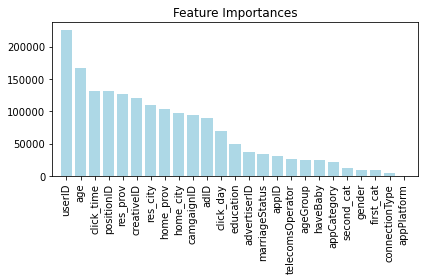

In [101]:
for i in range(len(importances_lgbm)):
    print("%2d) %-*s %f" % (i + 1, 30, 
                            fea_list[indices_lgbm[i]], 
                            importances_lgbm[indices_lgbm[i]]))

plt.title('Feature Importances')
plt.bar(range(len(importances_lgbm)), 
        importances_lgbm[indices_lgbm],
        color='lightblue', 
        align='center')

plt.xticks(range(len(importances_lgbm)), 
           np.array(fea_list)[indices_lgbm], rotation=90)

plt.xlim([-1, len(importances_lgbm)])
plt.tight_layout()

plt.show()

In [238]:
##select features based on random forest and light gradient boost tree models

In [104]:
fea_list2 = ['home_prov','age','res_city','click_time',
             'userID','positionID','click_day',
             'home_city','adID', 
             'education', 'creativeID','res_city','connectionType',
             'marriageStatus','telecomsOperator']

In [105]:
X_train_xgb = np.array (df_all_train[fea_list2],dtype = 'int32')

X_val_xgb = np.array (df_all_val[fea_list2],dtype = 'int32')

X_test_xgb = np.array (df_all_test[fea_list2],dtype = 'int32')

In [106]:
X_test_xgb.shape

(580403, 15)

In [419]:
conda install -c conda-forge xgboost

Solving environment: done

## Package Plan ##

  environment location: /Users/ttian/opt/anaconda3

  added / updated specs:
    - xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0           8 KB  conda-forge
    libxgboost-1.5.1           |   cpu_h598c753_2         2.2 MB  conda-forge
    py-xgboost-1.5.1           |cpu_py39hb0a6171_2         152 KB  conda-forge
    xgboost-1.5.1              |cpu_py39h037b50c_2          12 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.4 MB

The following NEW packages will be INSTALLED:

  _py-xgboost-mutex  conda-forge/osx-64::_py-xgboost-mutex-2.0-cpu_0
  libxgboost         conda-forge/osx-64::libxgboost-1.5.1-cpu_h598c753_2
  py-xgboost         conda-forge/osx-64::py-xgboost-1.5.1-cpu_py39hb0a6171_2
  xgb

In [107]:
import xgboost as xgb

In [108]:
from sklearn.metrics import accuracy_score
xgb_cl = xgb.XGBClassifier()

# Fit
xgb_cl.fit(X_train_xgb, y_train)

/Users/ttian/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:42:50] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [109]:
# Predict
preds_xgb = xgb_cl.predict(X_test_xgb)
preds_xgb_prob = xgb_cl.predict_proba (X_test_xgb)

In [110]:
xgb_ll = log_loss (y_test, preds_xgb_prob)

In [111]:
xgb_ll #0.1063

0.10634798663617798

In [112]:
importances_xgb = xgb_cl.feature_importances_


In [113]:
indices_xgb = np.argsort(importances_xgb)[::-1]

In [114]:
importances_xgb

array([0.03150245, 0.0361877 , 0.01876637, 0.02815631, 0.01870346,
       0.12036134, 0.02369634, 0.01763962, 0.10841349, 0.02843276,
       0.11333009, 0.        , 0.41159916, 0.02380169, 0.01940917],
      dtype=float32)

In [115]:
indices_xgb

array([12,  5, 10,  8,  1,  0,  9,  3, 13,  6, 14,  2,  4,  7, 11])

 1) connectionType                 0.411599
 2) positionID                     0.120361
 3) creativeID                     0.113330
 4) adID                           0.108413
 5) age                            0.036188
 6) home_prov                      0.031502
 7) education                      0.028433
 8) click_time                     0.028156
 9) marriageStatus                 0.023802
10) click_day                      0.023696
11) telecomsOperator               0.019409
12) res_city                       0.018766
13) userID                         0.018703
14) home_city                      0.017640
15) res_city                       0.000000


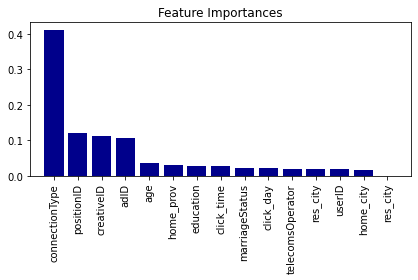

In [116]:
for i in range(len(importances_xgb)):
    print("%2d) %-*s %f" % (i + 1, 30, 
                            fea_list2[indices_xgb[i]], 
                            importances_xgb[indices_xgb[i]]))

plt.title('Feature Importances')
plt.bar(range(len(importances_xgb)), 
        importances_xgb[indices_xgb],
        color='darkblue', 
        align='center')

plt.xticks(range(len(importances_xgb)), 
           np.array(fea_list2)[indices_xgb], rotation=90)

plt.xlim([-1, len(importances_xgb)])
plt.tight_layout()

plt.show()